In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

In [ ]:
#read csv file
df=pd.read_csv('/content/drive/MyDrive/heart /heart.csv')
df

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df[df.duplicated()]

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

In [ ]:
for col in df.columns:
    print(f'column {col}')
    print('***********************************')
    print(df[col].value_counts(),'\n')

In [ ]:
df.describe()

In [ ]:
# drow boxplot of PhysicalHealth
def boxplot_drawer(Column_Name):
    sns.boxplot(y=Column_Name,data=df)

In [ ]:
def Remove_outliers(Column_Name):
    q1=df[Column_Name].quantile(0.25)
    q3=df[Column_Name].quantile(0.75)
    iqr=q3-q1
    df[Column_Name][(df[Column_Name]<(q1-1.5*iqr))|(df[Column_Name]>(q3+1.5*iqr))]=np.nan

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
g = sns.PairGrid(df[['age', 'trtbps', 'chol', 'thalachh', 'output']], hue='output', palette='husl')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.add_legend()
g.fig.suptitle('PairGrid of Selected Variables')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='output', y='age', data=df, palette='Set1')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cp', y='chol', data=df, ci='sd', palette='pastel')
plt.xlabel('Chest Pain Type')
plt.ylabel('Average Cholesterol Level')
plt.title('Average Cholesterol Level by Chest Pain Type')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cp', y='age', data=df, hue='output', split=True, palette='Set2')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.title('Age vs. Chest Pain Type with Heart Disease')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['thalachh'], c=df['output'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalachh)')
plt.title('Age vs. Max Heart Rate')
plt.colorbar(label='Heart Disease')
plt.show()

In [ ]:
sns.pairplot(df[['age', 'trtbps', 'chol', 'thalachh', 'output']], hue='output', diag_kind='kde', palette='husl')
plt.suptitle('Pairwise Relationships and Distributions')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [ ]:
import seaborn as sns

sns.boxplot(x='sex', y='chol', data=df)
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.title('Cholesterol Level by Sex')
plt.show()

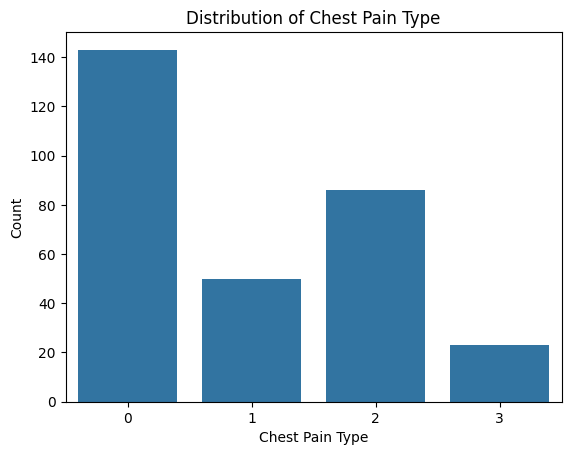

In [ ]:
import seaborn as sns

sns.countplot(x='cp', data=df)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type')
plt.show()

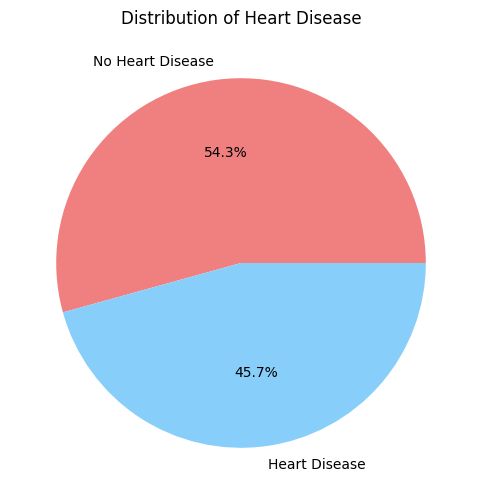

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['No Heart Disease', 'Heart Disease']
sizes = df['output'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Heart Disease')
plt.show()

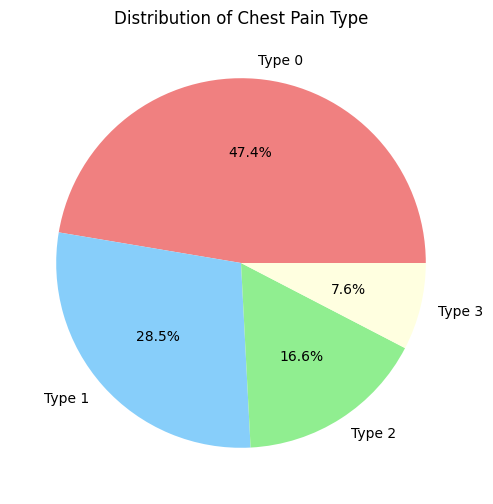

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['Type 0', 'Type 1', 'Type 2', 'Type 3']
sizes = df['cp'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow'])
plt.title('Distribution of Chest Pain Type')
plt.show()

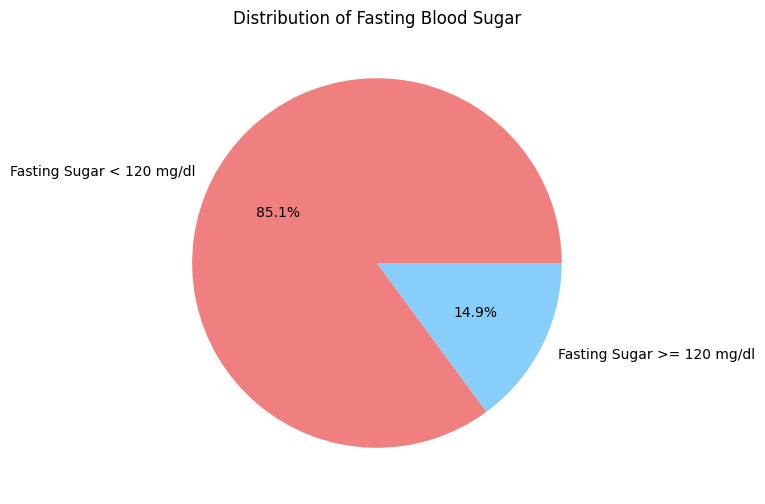

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['Fasting Sugar < 120 mg/dl', 'Fasting Sugar >= 120 mg/dl']
sizes = df['fbs'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Fasting Blood Sugar')
plt.show()

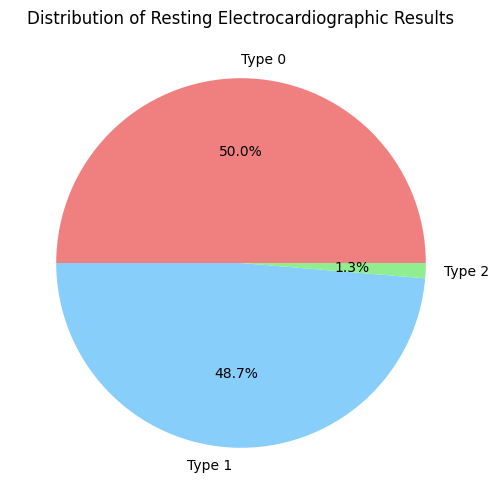

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['Type 0', 'Type 1', 'Type 2']
sizes = df['restecg'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribution of Resting Electrocardiographic Results')
plt.show()

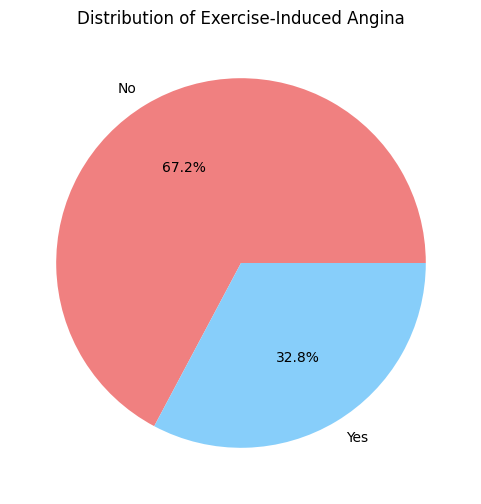

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['No', 'Yes']
sizes = df['exng'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Exercise-Induced Angina')
plt.show()

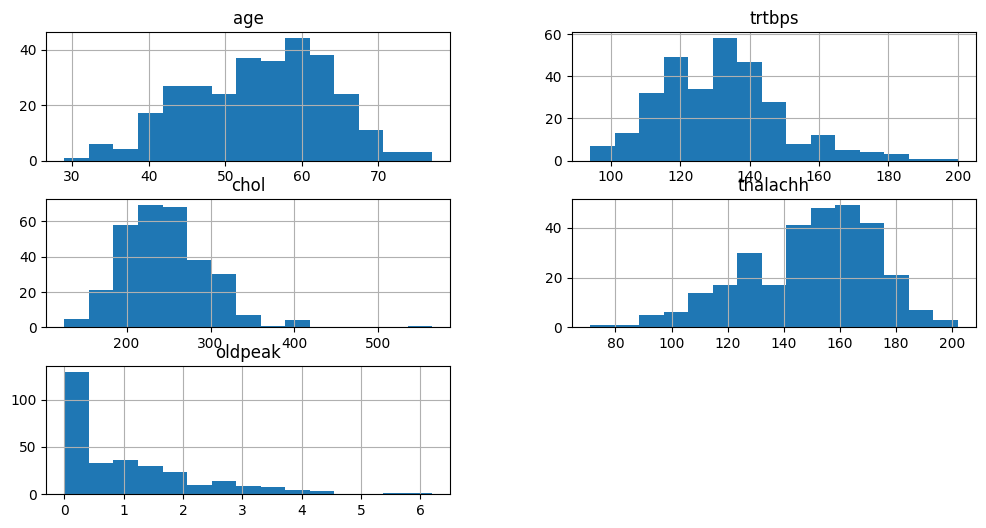

In [ ]:
# Explore the distribution of numerical features
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
df[numeric_features].hist(bins=15, figsize=(12, 6))
plt.show()

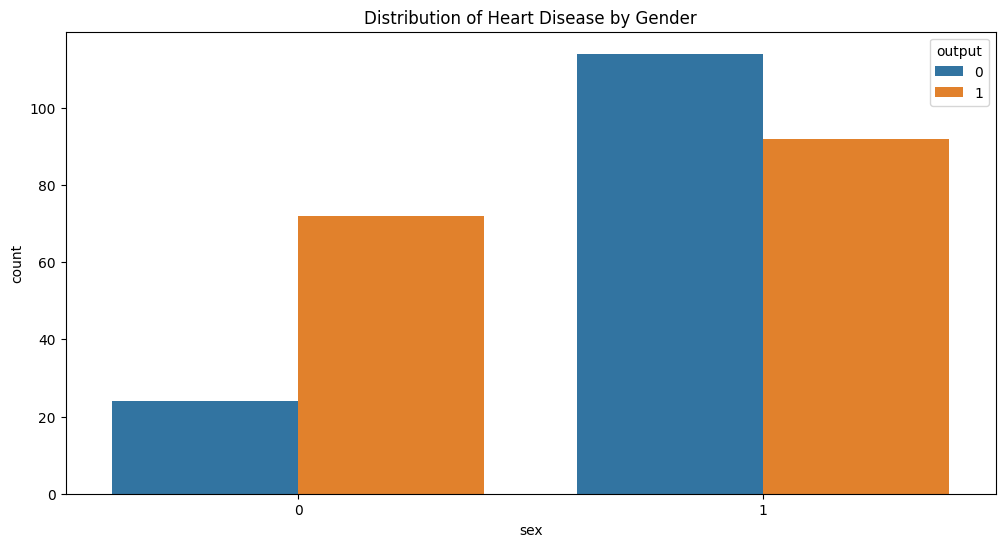

In [ ]:
# Explore the distribution of categorical features
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', data=df, hue='output')
plt.title('Distribution of Heart Disease by Gender')
plt.show()

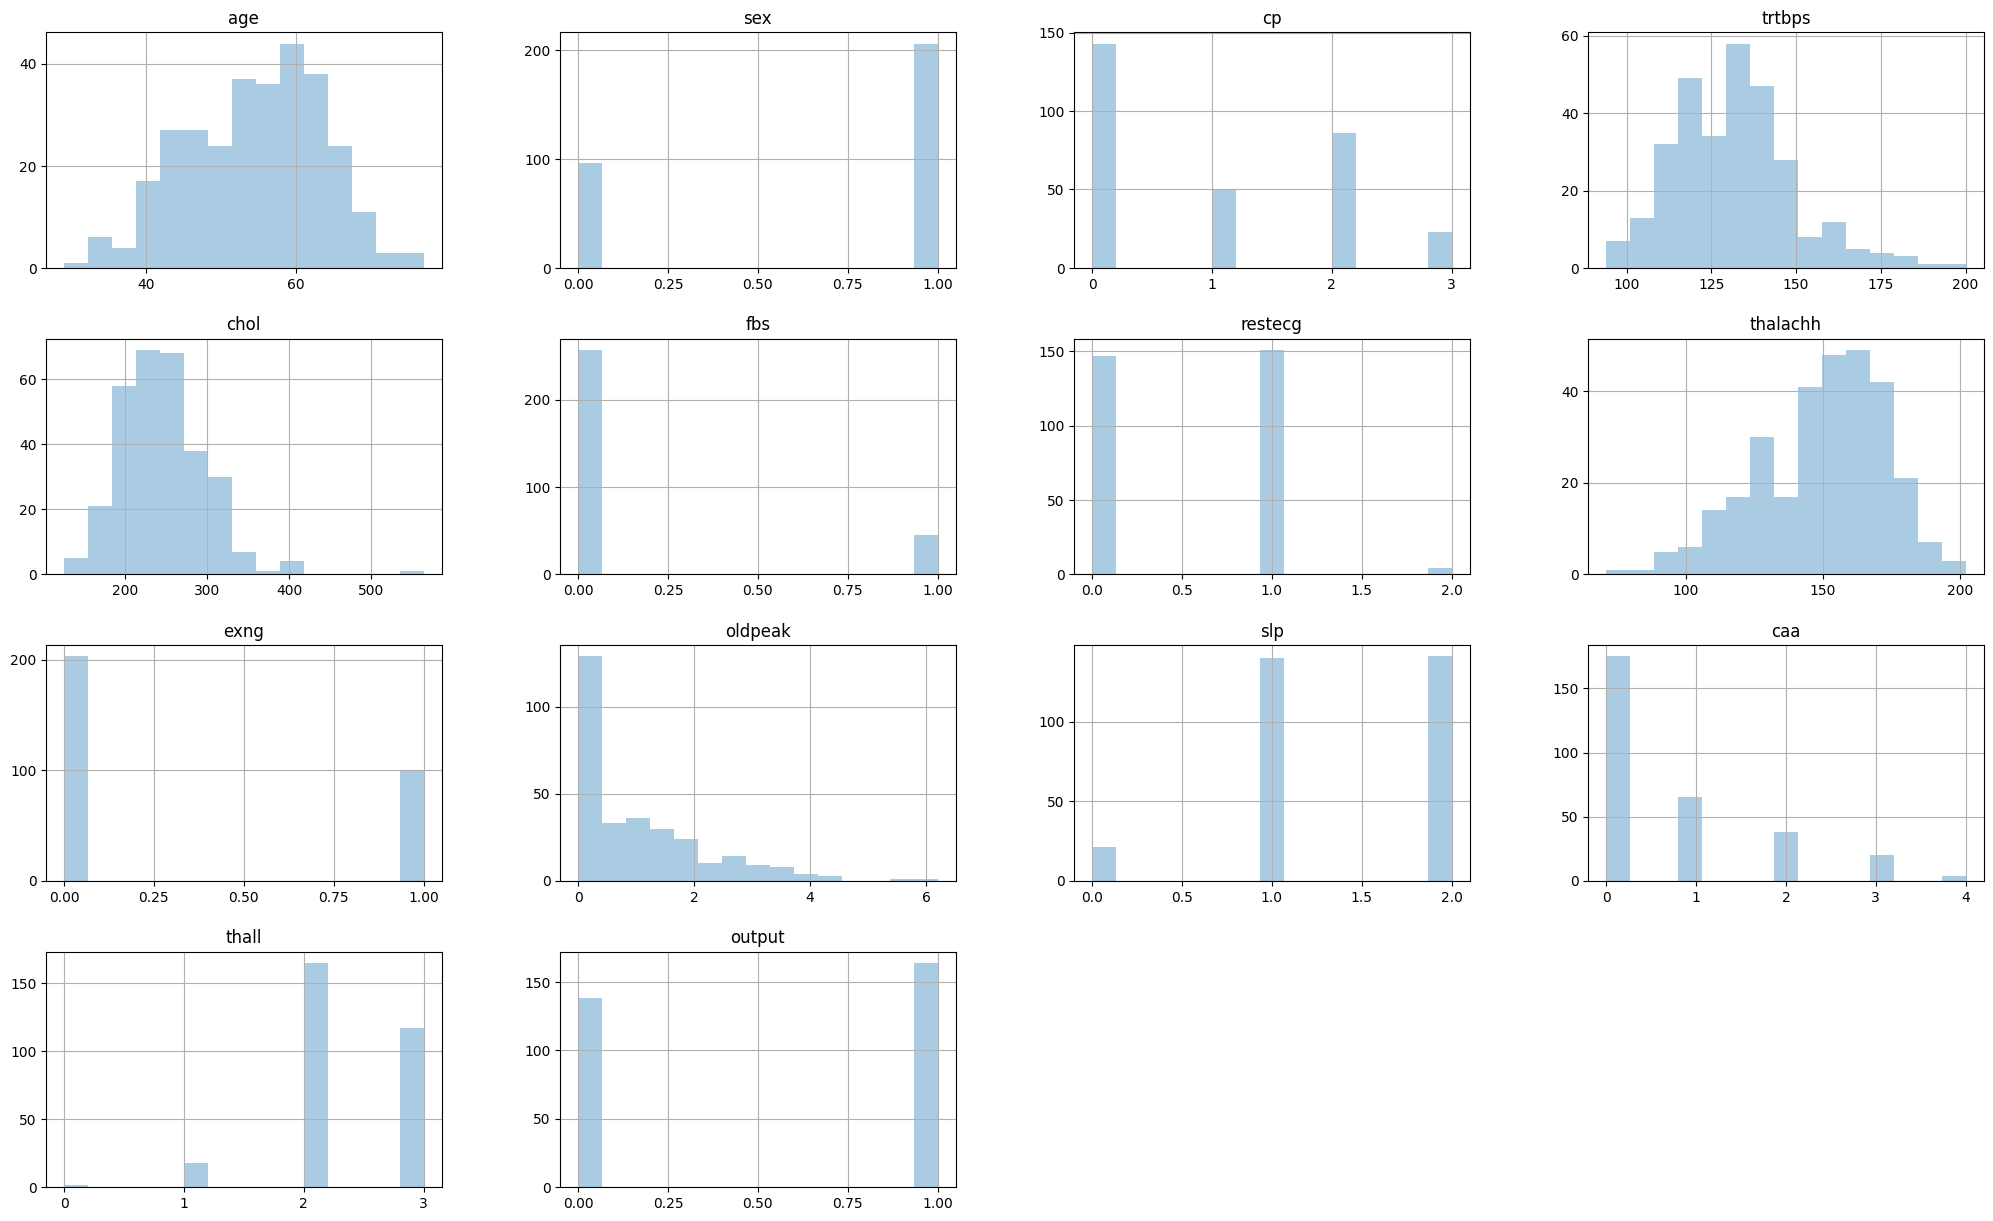

In [ ]:
color = '#a9cce3'
df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

<Axes: >

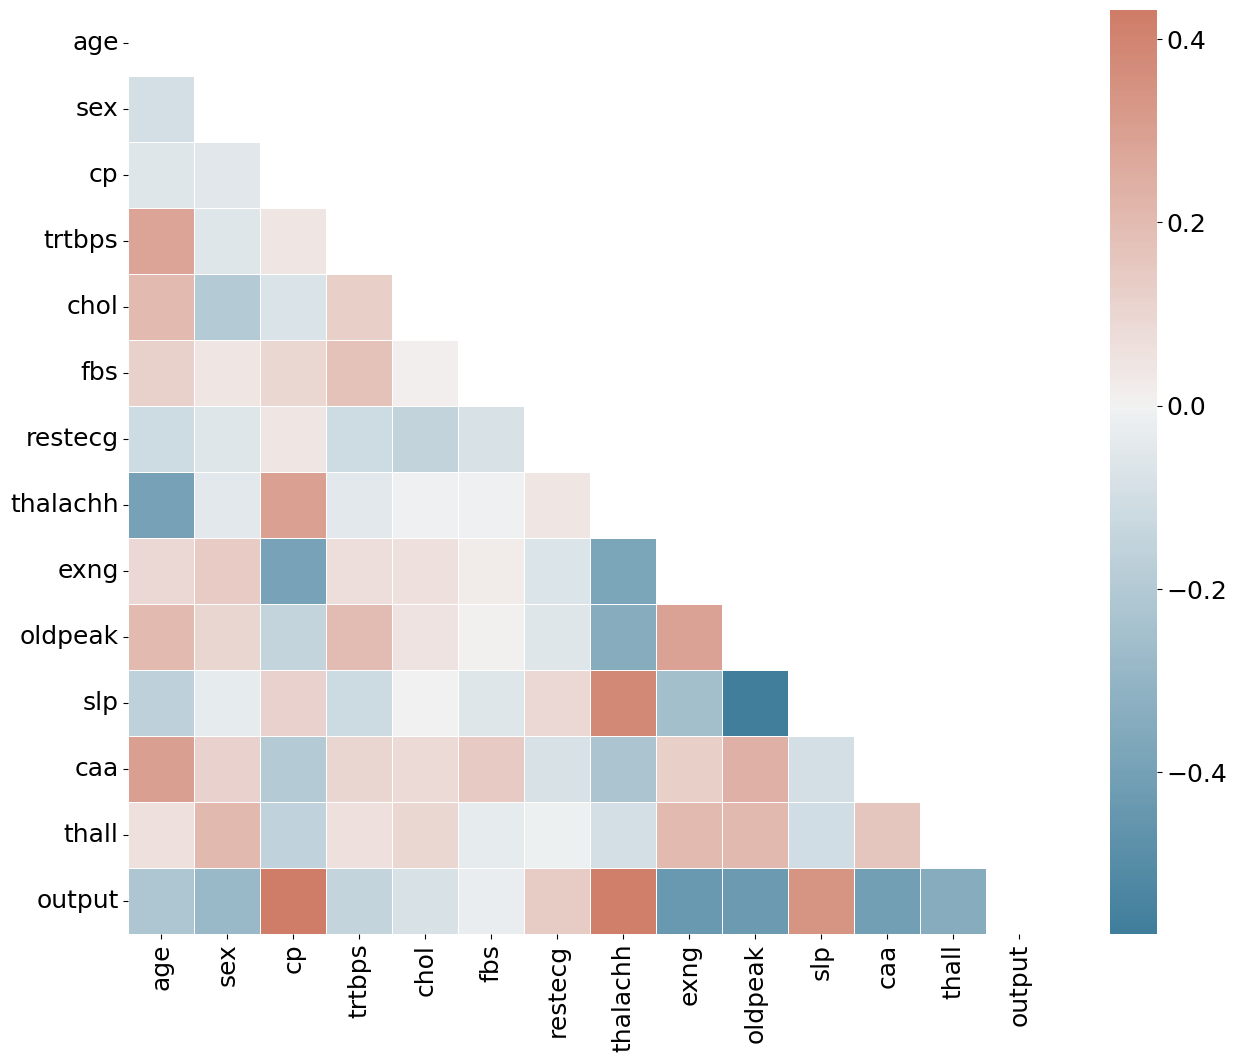

In [ ]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: >

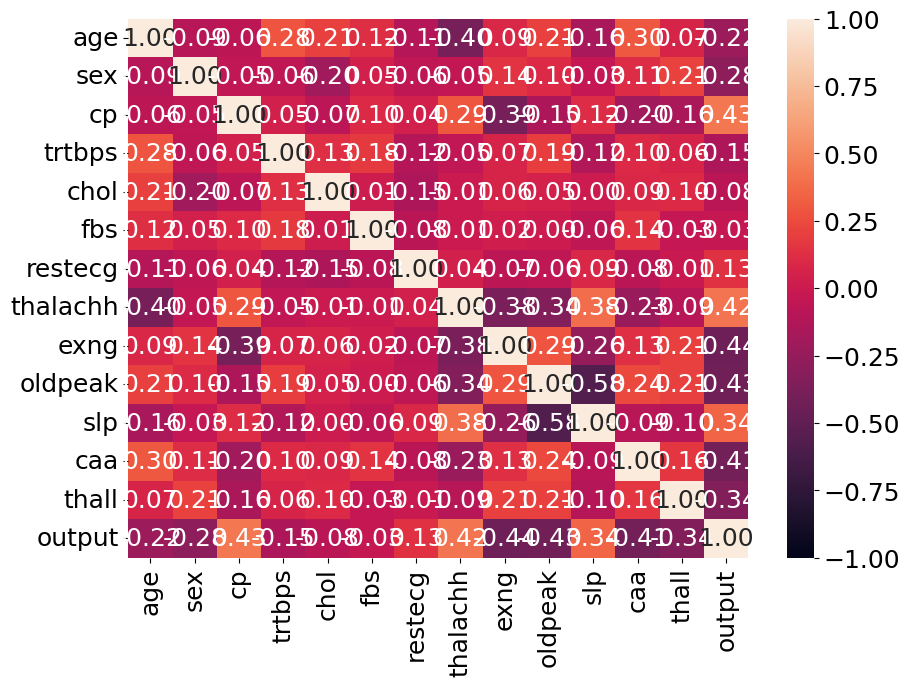

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1,fmt=".2f")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['output'])
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

[[25  4]
 [ 6 26]]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression ,LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC ,SVR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

In [ ]:
#data preprocessing
numeric_columns = ['trtbps', 'chol', 'thalachh', 'oldpeak']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the data and transform the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
y_pred_LR = LR_model.predict(X_test)

# Model Evaluation
print("Score the X-train with Y-train is : ", LR_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LR_model.score(X_test,y_test))
print("Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print("Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print("Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR))

print("Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_LR))

Score the X-train with Y-train is :  0.8589211618257261
Score the X-test  with Y-test  is :  0.8360655737704918
Model Evaluation Logistic R : mean absolute error is  0.16393442622950818
Model Evaluation Logistic R : mean squared  error is  0.16393442622950818
Model Evaluation Logistic R : median absolute error is  0.0
Model Evaluation Logistic R : accuracy score  0.8360655737704918


In [ ]:
#DecisionTreeClassifier

Tree_model=DecisionTreeClassifier(max_depth=10)

# fit model
Tree_model.fit(X_train,y_train)
y_pred_T =Tree_model.predict(X_test)

# Score X and Y - test and train
print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))
print("Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.8032786885245902
Model Evaluation Decision Tree : accuracy score  0.8032786885245902


In [ ]:
#DecisionTreeClassifier

Tree_model=DecisionTreeClassifier(max_depth=10)

# fit model
Tree_model.fit(X_train,y_train)
y_pred_T =Tree_model.predict(X_test)

# Score X and Y - test and train
print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))
print("Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

Score the X-train with Y-train is :  0.995850622406639
Score the X-test  with Y-test  is :  0.7704918032786885
Model Evaluation Decision Tree : accuracy score  0.7704918032786885


In [ ]:
# Model Preperation:
X = df.drop(columns="output")
y = df.output

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=3)
print(X.shape)
print(y.shape)

(302, 13)
(302,)


In [ ]:
# Select  Important columns

a = Tree_model.feature_importances_.tolist()
df_result=pd.DataFrame()
df_result["Columns"] = X_train.columns
df_result["Important Rate"] = a
df_result = df_result.sort_values(by="Important Rate", ascending=False)

df_result=df_result.reset_index(drop=True)

df_result

,Columns,Important Rate
0,thall,0.247669
1,age,0.136076
2,oldpeak,0.116054
3,caa,0.107272
4,chol,0.080151
5,trtbps,0.073519
6,thalachh,0.063093
7,slp,0.055622
8,cp,0.053264
9,sex,0.041942


In [ ]:
# using the model SVC
svc_model=SVC()

# fit model
svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print("Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.668141592920354
Score the X-test  with Y-test  is :  0.6052631578947368
Model Evaluation Decision Tree : accuracy score  0.6052631578947368


In [ ]:
# using the model SVR

svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)

# fit model
svr_model.fit(X_train,y_train)

y_pred_svr =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))
print("Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))

Score the X-train with Y-train is :  0.2774931472323884
Score the X-test  with Y-test  is :  0.30099048955869934
Model Evaluation Decision Tree : accuracy score  0.6052631578947368


In [ ]:
# using the model K Neighbors Classifier

K_model = KNeighborsClassifier(n_neighbors = 11)
K_model.fit(X_train, y_train)

y_pred_k = K_model.predict(X_test)

print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print("Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

Score the X-train with Y-train is :  0.7654867256637168
Score the X-test  with Y-test  is :  0.7105263157894737
Model Evaluation K Neighbors Classifier : accuracy score  0.7105263157894737


In [ ]:
# using the model Random Forest Classifier

RF_model = RandomForestClassifier(n_estimators = 300)
RF_model.fit(X_train, y_train)

y_pred_r = RF_model.predict(X_test)

print("Score the X-train with Y-train is : ", RF_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", RF_model.score(X_test,y_test))
print("Model Evaluation Random Forest Classifier : accuracy score " , accuracy_score(y_test,y_pred_r))

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.881578947368421
Model Evaluation Random Forest Classifier : accuracy score  0.881578947368421


In [ ]:
# Using GridSearchCv
pipe = Pipeline([
    ("scl", StandardScaler()),
    ("Classifier", LogisticRegression())
])

# Define the parameter grid for LogisticRegression
param_grid = [
    {"Classifier": [LogisticRegression()],
     "Classifier__C": np.logspace(-3, 3, 50),
     "Classifier__penalty": ["l1", "l2"],
     "Classifier__solver": ["liblinear"]
    }
    ,
     {"Classifier": [SVC()],
      "Classifier__C": np.logspace(-3, 3, 50),
      "Classifier__degree": np.arange(1,5),
      "Classifier__gamma": ["scale","auto"],
      "Classifier__decision_function_shape":["ovo", "ovr"]
     }
    ]

# Perform GridSearchCV with only Logistic Regression
g_search = GridSearchCV(pipe, param_grid=param_grid, scoring="f1", cv=10, n_jobs=-1)

In [ ]:
g_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('Classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'Classifier': [LogisticRegression(C=0.28117686979742307,
                                                            penalty='l1',
                                                            solver='liblinear')],
                          'Classifier__C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7....
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                          'Classifier__decision_function_shape': ['ovo', 'ovr'],
                          'Classifier__degree': array([1, 2, 3, 4]),
                          'Classifier__gamma': ['scale', 'auto']}],
             scoring='f1')

In [ ]:
print("Best Train Score: ", g_search.best_score_)
print("Best Params: ", g_search.best_params_)
print("Best Test Score : ",g_search.score(X_test, y_test))

Best Train Score:  0.8308852596678683
Best Params:  {'Classifier': LogisticRegression(C=0.28117686979742307, penalty='l1', solver='liblinear'), 'Classifier__C': 0.28117686979742307, 'Classifier__penalty': 'l1', 'Classifier__solver': 'liblinear'}
Best Test Score :  0.8865979381443299


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['output'])
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for RNN input (sequence length, number of features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the RNN model
model = keras.Sequential([
    layers.SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/10
6/6 [==============================] - 2s 60ms/step - loss: 0.6954 - accuracy: 0.5469 - val_loss: 0.6694 - val_accuracy: 0.5918
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6546 - accuracy: 0.6354 - val_loss: 0.6404 - val_accuracy: 0.6531
Epoch 3/10
6/6 [==============================] - 0s 11ms/step - loss: 0.6174 - accuracy: 0.6927 - val_loss: 0.6143 - val_accuracy: 0.6735
Epoch 4/10
6/6 [==============================] - 0s 11ms/step - loss: 0.5868 - accuracy: 0.7240 - val_loss: 0.5906 - val_accuracy: 0.7551
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 0.5580 - accuracy: 0.7656 - val_loss: 0.5701 - val_accuracy: 0.7755
Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 0.5320 - accuracy: 0.7760 - val_loss: 0.5523 - val_accuracy: 0.7755
Epoch 7/10
6/6 [==============================] - 0s 13ms/step - loss: 0.5112 - accuracy: 0.7969 - val_loss: 0.5363 - val_accuracy: 0.7755
Epoch 8/10
6/6 [=============

Epoch 1/50
8/8 [==============================] - 5s 216ms/step - loss: 0.5273 - accuracy: 0.4523 - val_loss: 0.4773 - val_accuracy: 0.4754
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.4675 - accuracy: 0.4523 - val_loss: 0.4240 - val_accuracy: 0.4754
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 0.4073 - accuracy: 0.4523 - val_loss: 0.3640 - val_accuracy: 0.4754
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.3255 - accuracy: 0.4647 - val_loss: 0.2962 - val_accuracy: 0.5082
Epoch 5/50
8/8 [==============================] - 0s 12ms/step - loss: 0.2480 - accuracy: 0.5975 - val_loss: 0.2276 - val_accuracy: 0.6721
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1814 - accuracy: 0.7095 - val_loss: 0.1802 - val_accuracy: 0.7541
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1551 - accuracy: 0.7842 - val_loss: 0.1595 - val_accuracy: 0.8197
Epoch 8/50
8/8 [==========

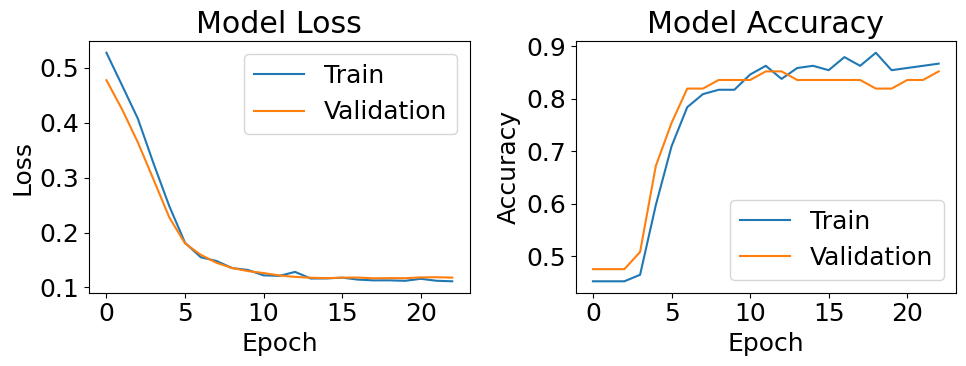

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define your RNN model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Plot training history (loss and accuracy)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot training & validation loss values
plt.subplot(121)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_accuracy = 0.8524590134620667

# Convert the test accuracy to a percentage string
accuracy_percentage = f"{test_accuracy * 100:.2f}%"

# Print the accuracy as a percentage
print(f"Test Accuracy: {accuracy_percentage}")

Test Accuracy: 85.25%
